# 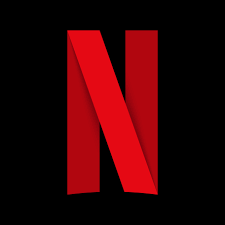           **Business Case: Netflix - Data Exploration and Visualisation**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021 , they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.



## **Problem Statement** ##

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries


---



The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:



1.  **Show_id:** Unique ID for every Movie / Tv Show
2.  **Type:** Identifier - A Movie or TV Show
3.  **Title:** Title of the Movie / Tv Show
4.  **Director:** Director of the Movie
5. **Cast:** Actors involved in the movie/show
6. **Country:** Country where the movie/show was produced
7. **Date_added:** Date it was added on Netflix
8. **Release_year:** Actual Release year of the movie/show
9. **Rating:** TV Rating of the movie/show
10. **Duration:** Total Duration - in minutes or number of seasons




**Listed_in:** Genre
**Description:** The summary description



### **Initial Analysis**

In [44]:
#importing  neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [45]:
#reading csv file
df=pd.read_csv('/content/netflix.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [47]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [48]:
#filling nan values
df['director']=df['director'].fillna('Unknown Director')
df['cast']=df['cast'].fillna('Unknown Actor')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [50]:
#date into datetime
df['date_added']=pd.to_datetime(df['date_added'])
df['week']=df['date_added'].dt.isocalendar().week
df['month']=df['date_added'].dt.month_name()
df['year']=df['date_added'].dt.year.astype('Int64')
df['release_date']=pd.to_datetime(df['release_year'],format='%Y')
df['difference']=df['date_added']-df['release_date']  # difference between release date and date_added assuming jan 1 as the date for all the release

In [51]:
netflix_movies=df[df['type']=='Movie']
netflix_tv_show=df[df['type']=='TV Show']


In [52]:
#unnesting countries
country = df.copy()
country['country'] = country['country'].str.split(', ')
country = country.explode('country')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month,year,release_date,difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,September,2021,2020-01-01,633 days
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,September,2021,2021-01-01,266 days
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38,September,2021,2021-01-01,266 days
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38,September,2021,2021-01-01,266 days
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,38,September,2021,2021-01-01,266 days


In [53]:
#unnesting actors
actors=df.copy()
actors['cast']=actors['cast'].str.split(', ')
actors=actors.explode('cast')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month,year,release_date,difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,September,2021,2020-01-01,633 days
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,September,2021,2021-01-01,266 days
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,September,2021,2021-01-01,266 days
1,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,September,2021,2021-01-01,266 days
1,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,September,2021,2021-01-01,266 days


In [54]:
#unnesting director
directors=df.copy()
directors['director']=directors['director'].str.split(', ')
directors=directors.explode('director')



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month,year,release_date,difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,September,2021,2020-01-01,633 days
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,September,2021,2021-01-01,266 days
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,38,September,2021,2021-01-01,266 days
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",38,September,2021,2021-01-01,266 days
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,38,September,2021,2021-01-01,266 days


In [55]:
#unnesting genres
genres=df.copy()
genres['listed_in']=genres['listed_in'].str.split(', ')
genres=genres.explode('listed_in')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month,year,release_date,difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,September,2021,2020-01-01,633 days
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",38,September,2021,2021-01-01,266 days
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",38,September,2021,2021-01-01,266 days
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",38,September,2021,2021-01-01,266 days
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,38,September,2021,2021-01-01,266 days


### **1) How has the number of movies released per year changed over the last 20-30 years?**

In [56]:
max_year=df['release_year'].max()   #max year
max_year

2021

In [57]:
last_30_years=df[(df['release_year']<=max_year)&(df['release_year']>=max_year-30)]
last_30_years_movies=last_30_years[last_30_years['type']=='Movie']


In [58]:
last_30_years_movies['release_year'].value_counts()     # Nn graphical

2017    767
2018    767
2016    658
2019    633
2020    517
2015    398
2021    277
2014    264
2013    225
2012    173
2010    154
2011    145
2009    118
2008    113
2006     82
2007     74
2005     67
2004     55
2003     51
2002     44
2001     40
1997     34
2000     33
1998     32
1999     32
1993     24
1995     23
1996     21
1994     20
1992     20
1991     16
Name: release_year, dtype: int64

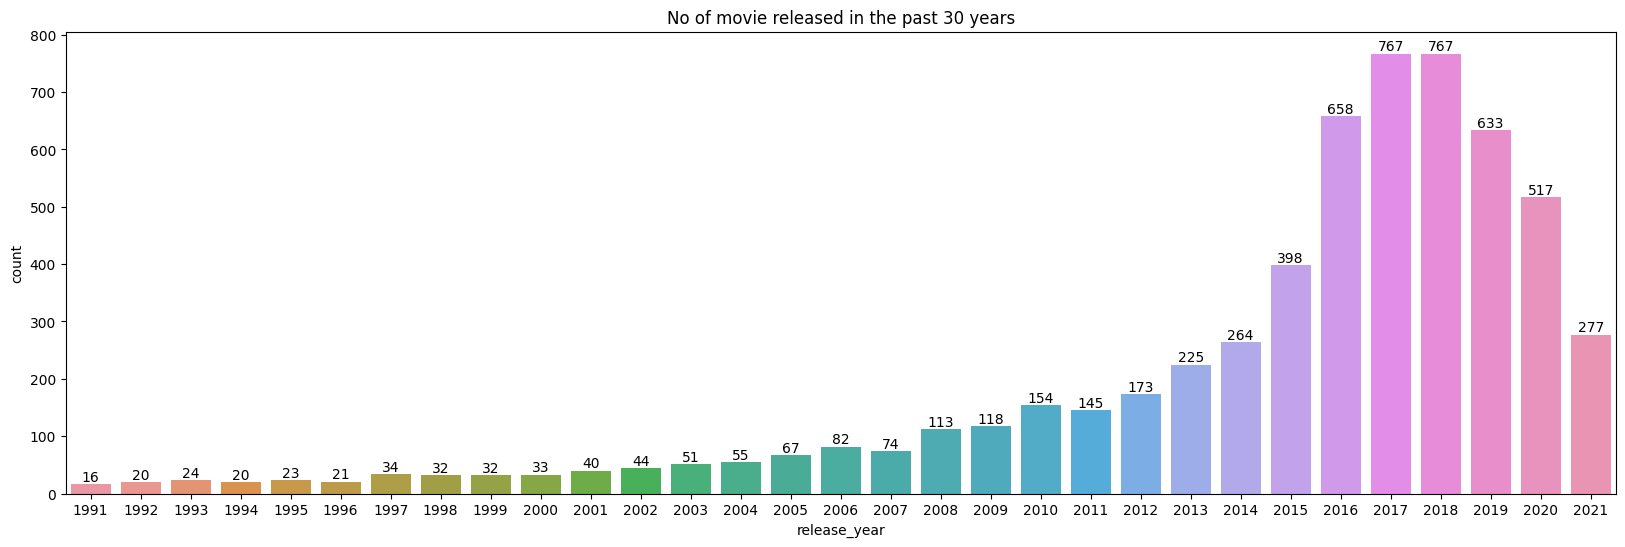

In [59]:
plt.figure(figsize=(20,6))
ax=sns.countplot(last_30_years_movies,x='release_year')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('No of movie released in the past 30 years')
plt.show()

The film industry peaked in **2017** and **2018** with **767** movies released each year. However, releases **decreased** from 2019 to 2021 due to **COVID-19**. The lowest number of releases was **16** in **1991**.There has been an **almost consistent upward trend** in the number of movie releases from 1991 to 2018, signifying the resilience and adaptability of the film industry.

### **2)Comparison of tv shows vs. movies**

#### **a)Comparison over the past 30 years**

(1991.0, 2026.575)

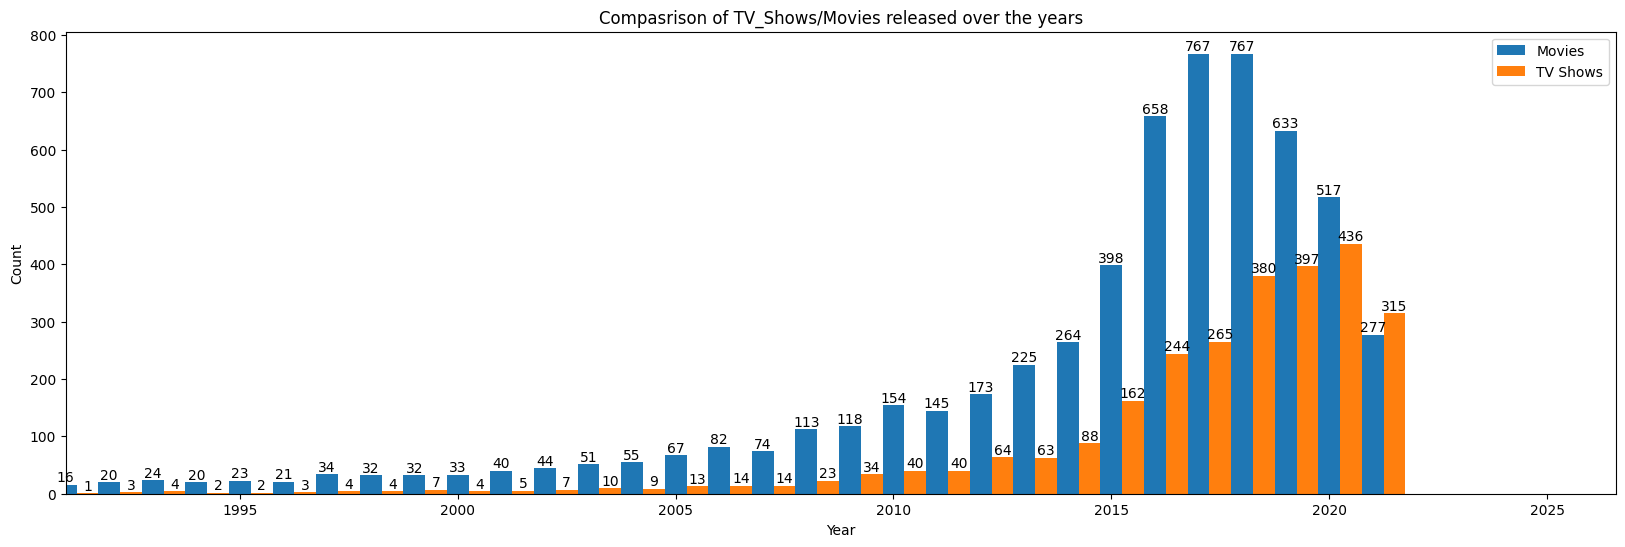

In [60]:
width=0.5
plt.figure(figsize=(20,6))
ax1=plt.bar(netflix_movies['release_year'].value_counts().index,netflix_movies['release_year'].value_counts(),width,label="Movies")
ax2=plt.bar(netflix_tv_show['release_year'].value_counts().index+width,netflix_tv_show['release_year'].value_counts(),width,label="TV Shows")
plt.bar_label(ax1, fontsize=10)
plt.bar_label(ax2, fontsize=10)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Compasrison of TV_Shows/Movies released over the years')
plt.legend()
plt.xlim(1991,None)

Over the past few years, the entertainment industry has seen a consistent trend where the number of movies released annually has surpassed the number of TV shows. This trend, however, experienced a significant shift in 2015.

In **2020**, the number of TV shows released remarkably caught up with the number of movies. This could be attributed to the global pandemic situation, which might have led to an increased demand for home entertainment options like TV shows.

Interestingly, in 2021, the trend took an unexpected turn. For the first time, the number of TV shows released in a year surpassed the number of movies. Specifically, there were **315** TV shows released in 2021 while number of movies released were **277**. This indicates a potential shift in the industry’s focus towards producing more episodic content, possibly driven by the rising popularity of streaming platforms and changing viewer preferences

#### **b)Comparison based on Top 10 Countries**

In [61]:
netflix_movies_count=netflix_movies.groupby('country')['title'].nunique()
netflix_movies_country_top_10=netflix_movies_count.sort_values(ascending=False).head(10)

In [62]:
netflix_movies_country_top_10

country
United States     2058
India              892
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: title, dtype: int64

In [63]:
netflix_tv_show_count=netflix_tv_show.groupby('country')['title'].nunique()
netflix_tv_show_country_top_10=netflix_tv_show_count.sort_values(ascending=False).head(10)

In [64]:
netflix_tv_show_country_top_10

country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: title, dtype: int64

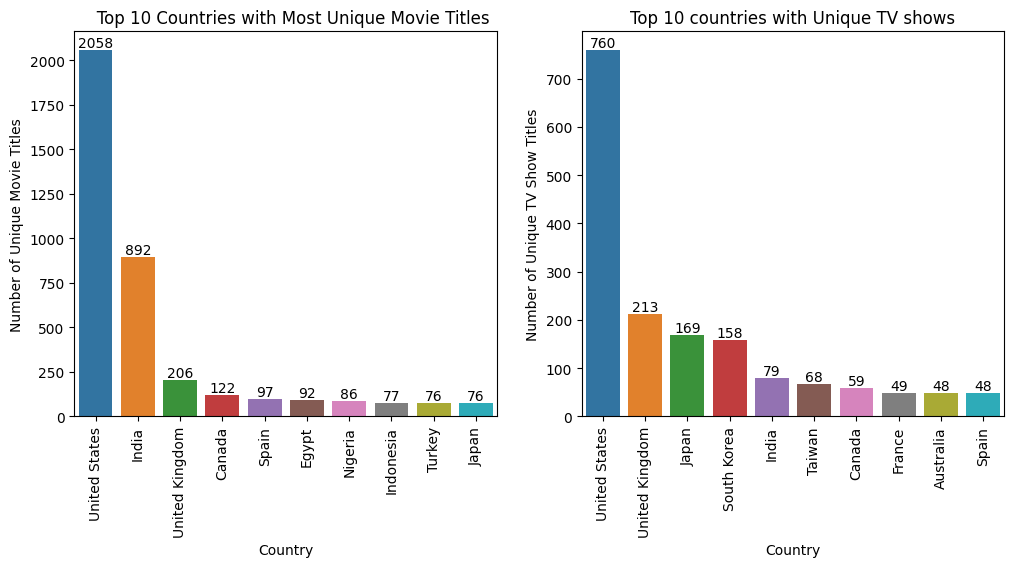

In [65]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
ax=sns.barplot(x=netflix_movies_country_top_10.index, y=netflix_movies_country_top_10.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('   Top 10 Countries with Most Unique Movie Titles')
plt.xlabel('Country')
plt.ylabel('Number of Unique Movie Titles')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax=sns.barplot(x=netflix_tv_show_country_top_10.index, y=netflix_tv_show_country_top_10.values)
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Top 10 countries with Unique TV shows')
plt.xlabel('Country')
plt.ylabel('Number of Unique TV Show Titles')
plt.xticks(rotation=90)
plt.show()

In the global entertainment industry, the **United States** leads the pack, producing the highest number of both movies and TV shows. **India** follows closely in movie production, securing the second position, while it ranks seventh in TV show production.
**Japan**, known for its rich **anime culture**, holds the third position in TV show production and the eighth in movie production. This could be attributed to the growing global demand for anime.
Interestingly, **China**, despite its vast media industry, does not appear in the top ten for TV show production. This comes as a surprise given the country's significant contributions to global media.
**South Korea**, on the other hand, has secured the fourth position in TV show production. This could be linked to the rising popularity of** web novel adaptations** and **romantic comedies**, which have found a dedicated audience in binge-watchers worldwide.
In summary, these rankings reflect the dynamic nature of the global entertainment industry and the diverse viewing preferences of audiences worldwide. They highlight the influence of cultural trends, such as the rise of anime and Korean dramas, on media production. However, they also underscore the enduring dominance of traditional powerhouses like the United States and India in movie production.

### **3)What is the best time to launch a TV show or a Movie?**

#### **a)Find which is the best week to release the Tv-show or the movie**

In [66]:
netflix_week_tv_shows=netflix_tv_show.groupby("week").size().sort_values(ascending=False)
netflix_week_movies=netflix_movies.groupby('week').size().sort_values(ascending=False)

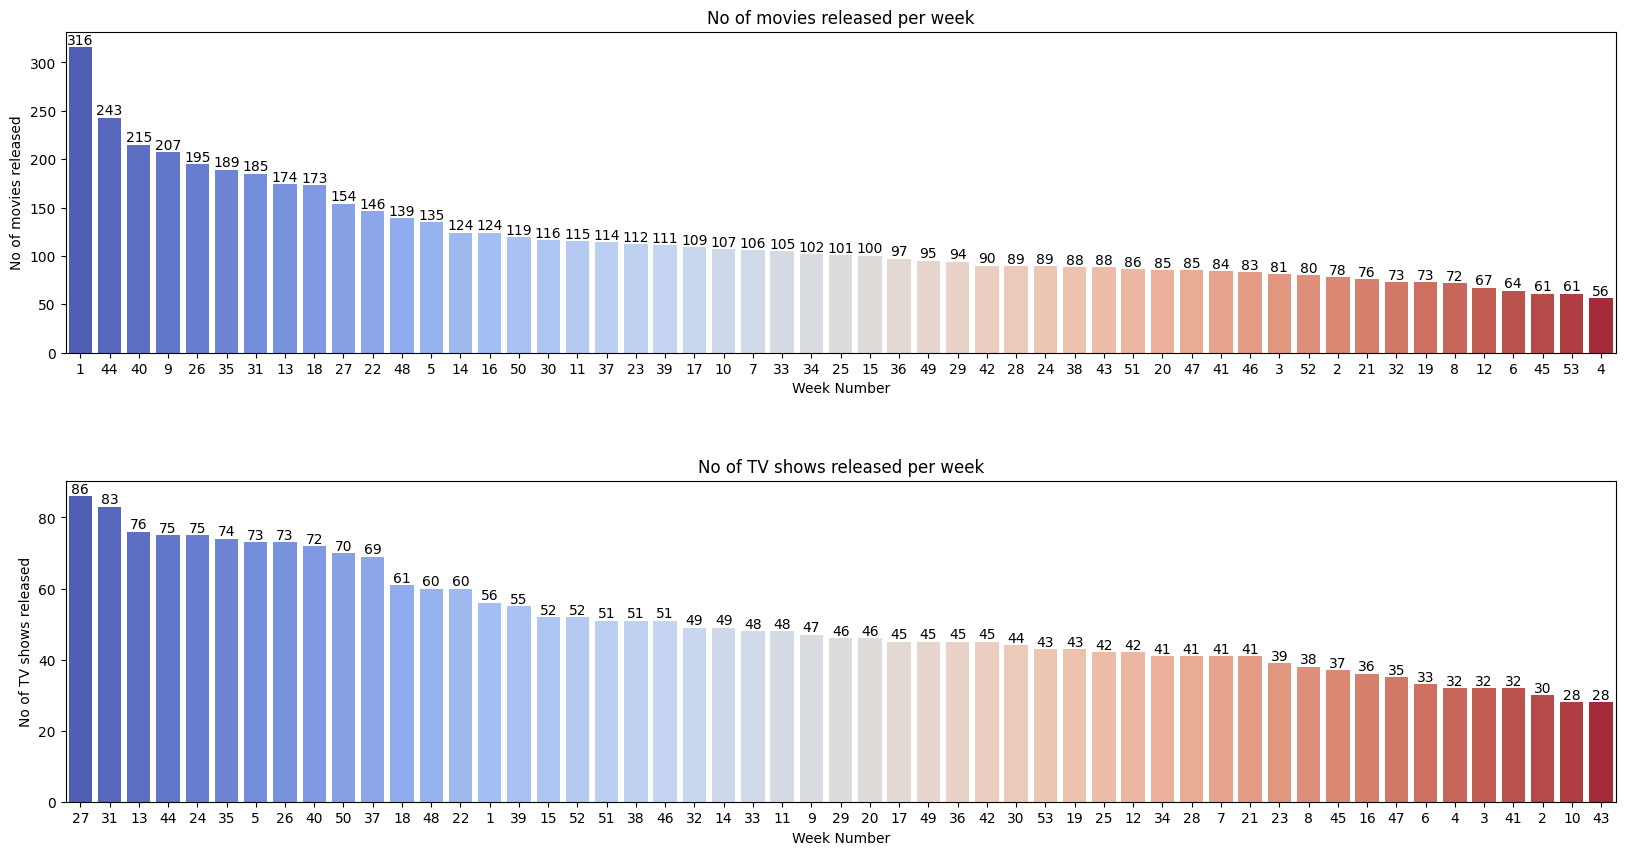

In [67]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
order=netflix_week_movies.index
palette=sns.color_palette("coolwarm", len(order))
ax=sns.barplot(x=order,y=netflix_week_movies.values,order=order,palette=palette)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Week Number')
plt.ylabel('No of movies released')
plt.title('No of movies released per week')

plt.subplots_adjust(hspace = 0.4)

plt.subplot(2,1,2)
order=netflix_week_tv_shows.index
palette=sns.color_palette("coolwarm", len(order))
ax=sns.barplot(x=netflix_week_tv_shows.index,y=netflix_week_tv_shows.values,order=order,palette=palette)
ax.bar_label(ax.containers[0], fontsize=10)

plt.xlabel('Week Number')
plt.ylabel('No of TV shows released')
plt.title('No of TV shows released per week')

plt.show()

**Movies:** The data shows that the **first week** of the year is the most popular for movie releases, with a total of 316 movies released during this period. This could be due to a variety of factors, such as studios wanting to start the year off strong or taking advantage of holiday audiences. However, the fourth week sees the least number of releases, with only 56 movies. This could be a strategic decision by studios to avoid competition with movies released earlier in the month.

**TV Shows:** In contrast to movies, the **27th** week of the year sees the highest number of TV show releases, with a total of 86. This period, which falls in the middle of the year, might be chosen for releases to coincide with summer holidays when viewership might be higher. The weeks with the least number of TV show releases are the 10th and 43rd weeks, each with 38 releases. These periods might see lower viewership due to factors like school exams or the start of the holiday season

#### **b)Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies**

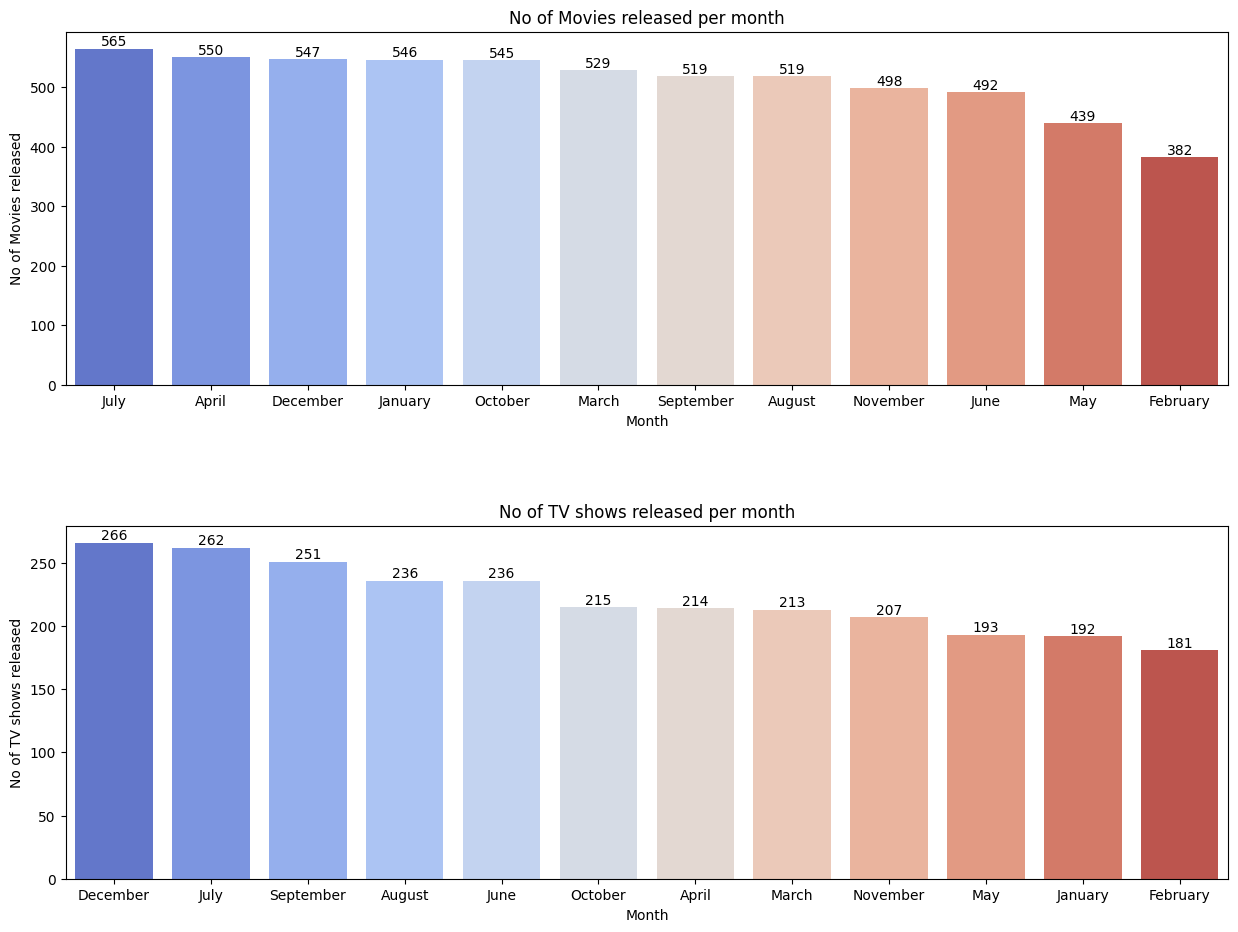

In [68]:

plt.figure(figsize=(15,11))
plt.subplot(2,1,1)
order = netflix_movies['month'].value_counts().index
palette = sns.color_palette("coolwarm", len(order))

# Create a dictionary that maps month to color
month_to_color = {month: color for month, color in zip(order, palette)}

ax=sns.countplot(data=netflix_movies,x='month',order=order,palette=month_to_color)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Month')
plt.ylabel('No of Movies released')
plt.title('No of Movies released per month')

plt.subplots_adjust(hspace = 0.4)
plt.subplot(2,1,2)
order = netflix_tv_show['month'].value_counts().index
palette = sns.color_palette("coolwarm", len(order))

# Create a dictionary that maps month to color
month_to_color = {month: color for month, color in zip(order, palette)}
ax=sns.countplot(data=netflix_tv_show,x='month',order=order,palette=month_to_color)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Month')
plt.ylabel('No of TV shows released')
plt.title('No of TV shows released per month')

plt.show()

The release patterns of TV shows and movies are influenced by several factors, including seasonal trends, audience preferences, and strategic marketing decisions.

For TV shows, **December** has the highest number of releases (**266**) from **1925** to **2021**. This could be due to the holiday season when people generally have more **free time to watch TV**. On the other hand, **February** has the least number of TV shows released (**181**). This could be because February is a shorter month and also not a traditional period for new TV show releases.

As for movies, **July** has the highest number of releases (**565**). This is typically the summer blockbuster season when big-budget films are released to take advantage of the **school holidays** (especially in **USA**). Conversely, **February** has the least number of movie releases (**382**). This could be due to it being a traditionally slower period in the movie industry after the award season.

### **4)Analysis of actors/directors of different types of shows/movies**

#### **a)Identify the top 10 actors  and Directors who have appeared in most movies or TV shows.**

In [69]:
#top 10 actors and directors
top_10_actors=actors['cast'].value_counts().sort_values(ascending=False).head(10)
top_10_director=directors['director'].value_counts().sort_values(ascending=False).head(10)

In [70]:
top_10_actors

Unknown Actor       825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Name: cast, dtype: int64

In [71]:
top_10_director

Unknown Director       2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
Name: director, dtype: int64

In [72]:
#top 10_actors after removing unknows
top_10_actors_filtered=actors[actors['cast'] !='Unknown Actor']['cast'].value_counts().sort_values(ascending=False).head(10)
#top 10 directors after removing unknown
top_10_directors_filtered=directors[directors['director']!='Unknown Director']['director'].value_counts().sort_values(ascending=False).head(10)

In [73]:
top_10_directors_filtered

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64

In [74]:
top_10_actors_filtered

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64

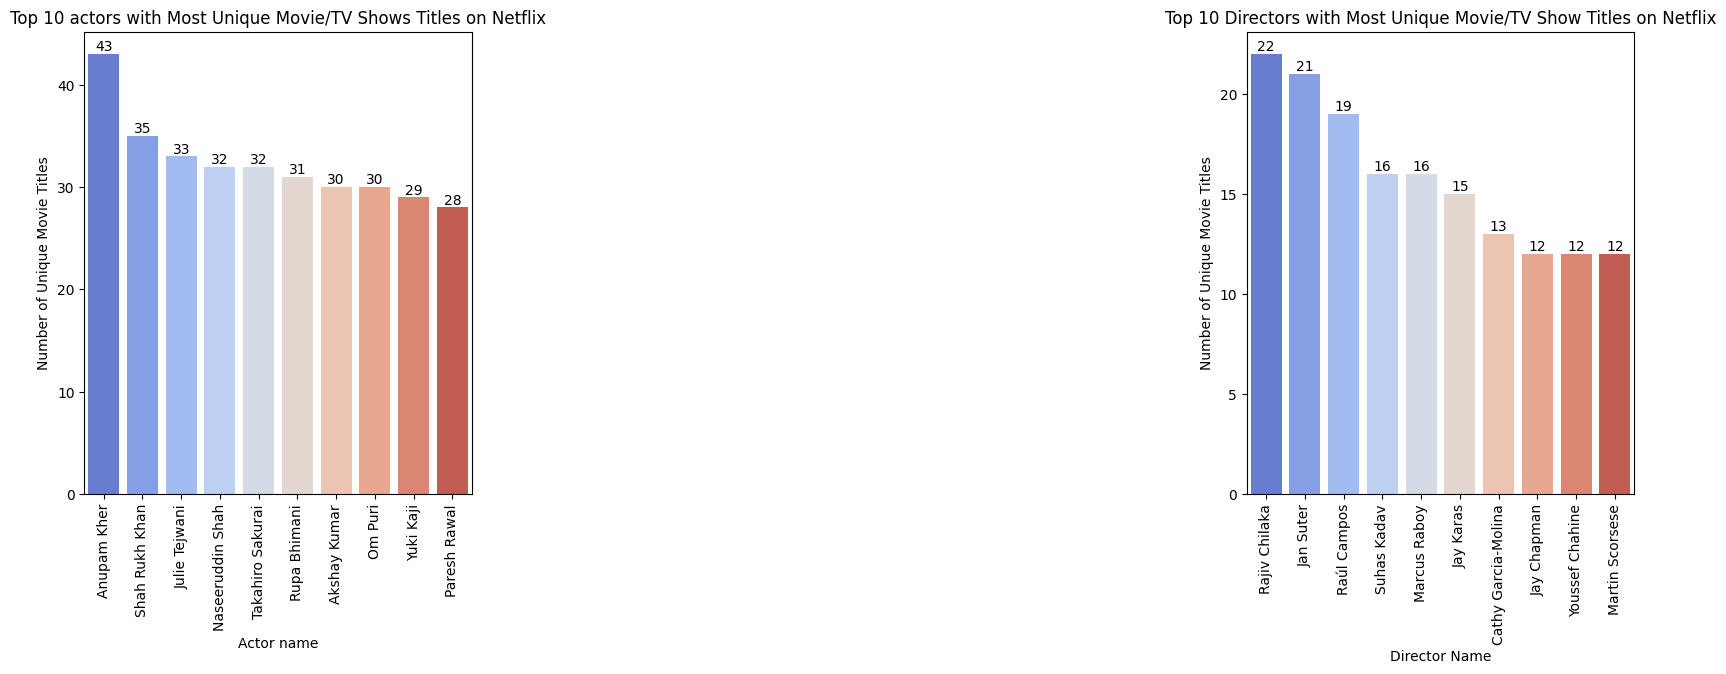

In [90]:

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
order=top_10_actors_filtered.index
palette=sns.color_palette("coolwarm", len(order))
actor_to_color = {actor: color for actor, color in zip(order, palette)}
ax=sns.barplot(x=top_10_actors_filtered.index,y=top_10_actors_filtered.values,order=order,palette=actor_to_color)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 actors with Most Unique Movie/TV Shows Titles on Netflix')
plt.xlabel('Actor name')
plt.ylabel('Number of Unique Movie Titles')
plt.xticks(rotation=90)

plt.subplots_adjust(wspace=2)
plt.subplot(1,2,2)
order=top_10_directors_filtered.index
palette=sns.color_palette("coolwarm", len(order))
director_to_color = {actor: color for actor, color in zip(order, palette)}
ax=sns.barplot(x=top_10_directors_filtered.index,y=top_10_directors_filtered.values,order=order,palette=director_to_color)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top 10 Directors with Most Unique Movie/TV Show Titles on Netflix')
plt.xlabel('Director Name')
plt.ylabel('Number of Unique Movie Titles')
plt.xticks(rotation=90)
plt.show()

It’s interesting to note that **Anupam Kher** and **Shah Rukh Khan**, two of the most celebrated actors in Indian cinema, have a significant presence on Netflix.Anupam Kher, a veteran actor with a career spanning over four decades, has an impressive **43** movies available on Netflix.On the other hand, Shah Rukh Khan, often referred to as the **“King of Bollywood”**, has **35** of his movies on Netflix.The significant number of their films on Netflix not only reflects their prolific careers but also their popularity among audiences worldwide. It’s a testament to their enduring appeal and the global reach of Indian cinema.

In the top 10 **directors** the director with the most work available in netflix is** Rajiv Chilaka** with 22 directorials  whose notable work is the **Chota Bheem **Series which enjoys a massive fanbase in India.The trend suggests a growing demand for animated content, especially those that resonate with local cultures and stories.

It is interesting to note than the all the directorial works of **Jan Suter** who is a mexican comedian is available in netflix.
This trend indicates the **popularity of stand-up comedy** content on streaming platforms, providing a global platform for comedians to reach a wider audience.
The most famous director in the list will be Martin Scorsese who is known for his gripping narrative has 12 of his movies available on Netflix.This suggests a trend towards bringing **high-quality, critically acclaimed content** to streaming platforms.

In conclusion, Netflix’s diverse content, ranging from local animations to stand-up comedy specials to critically acclaimed films, caters to a wide range of audience preferences. This trend is likely to continue as streaming platforms strive to provide varied and high-quality content to their viewers.

### **5) Which genre movies are more popular or produced more**

In [99]:
genres_movies=genres[genres['type']=='Movie']    # get the movie data from genre dataframe
genres_movies['listed_in'].value_counts()

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: listed_in, dtype: int64

In [94]:
genres_tv_shows=genres[genres['type']=='TV Show']
genres_tv_shows['listed_in'].value_counts()


International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: listed_in, dtype: int64

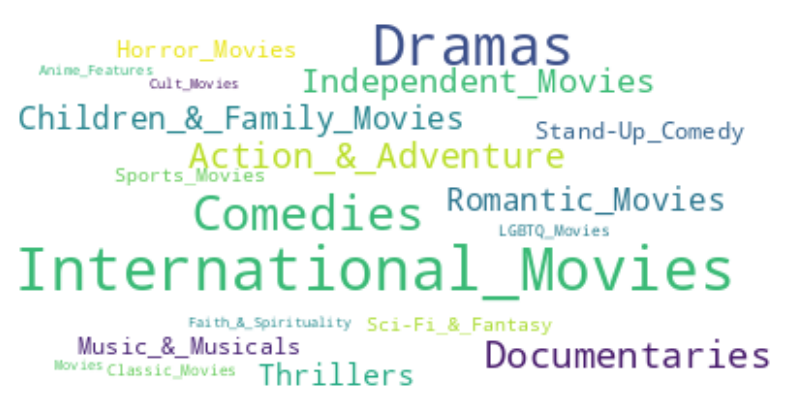

In [77]:
text=[s.replace(' ','_') for s in genres_movies.listed_in]   # inorder to get the entire word i used '_'
text=' '.join(i for i in text)
word_freq = Counter(text.split())
stopwords=set(STOPWORDS)  # setting stop words
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

The word cloud analysis reveals that the most popular movie genres are **International Movies**, **Drama**, and Comedies. Interestingly, Documentaries are more frequent than Action Movies.

### **6)Find After how many days the movie will be added to Netflix after the release of the movie**

<BarContainer object of 14 artists>

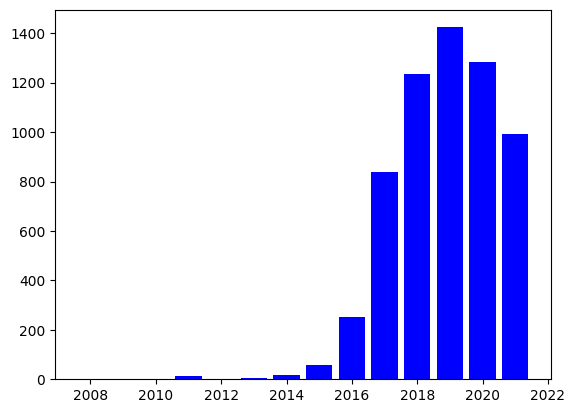

In [78]:
plt.bar(netflix_movies['year'].value_counts().index, netflix_movies['year'].value_counts().values, color='b', label='Movies', linewidth=2)

In [87]:
df_after_2015=netflix_movies[netflix_movies['release_year']>=2015]

In [88]:
df_after_2015['difference'].value_counts()

334 days     29
546 days     28
424 days     26
365 days     23
639 days     22
             ..
1833 days     1
908 days      1
543 days      1
185 days      1
1014 days     1
Name: difference, Length: 1165, dtype: int64

In [81]:
mode_difference=df_after_2015['difference'].mode()[0]
mode_difference

Timedelta('911 days 00:00:00')

The mode of the number of days between a movie’s release and its addition to Netflix is **334 days**.
There’s a wide variability in this time frame, with some movies added shortly after release and others taking several years.
Since 2015, there’s been an increase in movie releases, which could impact the average time to Netflix.This analysis is based on the release year of the movie.

## **Recommendations**

Based on the additional insights, here are some further recommendations for Netflix to consider for its growth:



*   **Leveraging the Powerhouses:** Traditional powerhouses like the United States and India continue to dominate in movie production. Collaborations or partnerships in these markets could be beneficial.
*   **Leveraging Seasonal Trends:** With December being the month with the highest number of TV show releases and July for movies, these months could be targeted for releasing high-potential projects to maximize viewership.
*  **Strategic Planning for Low Release Periods:** February, which sees the least number of releases for both movies and TV shows, could be utilized as a strategic window to release content and avoid competition.
* **Timing of Releases**: Given the popularity of the first week of the year for movie releases and the 27th week for TV show releases, producers might want to consider these periods for their releases to capitalize on established audience habits.
* **Adapting to Global Events:** The decrease in releases from 2019 to 2021 due to COVID-19 highlights the need for the industry to be adaptable and resilient in the face of global events. Exploring alternative content delivery methods, such as streaming and on-demand platforms, could be key to maintaining production during such periods.
*   **Diversifying Content:** The increasing global popularity of international movies, dramas, and comedies suggests a growing appetite for diverse content. Producers might want to give more importance to these genres in their movie sections. This could involve investing in foreign language films, co-producing projects with international studios, or acquiring distribution rights for international content. This strategy could help cater to a broader audience and tap into new markets.
* **Capitalizing on TV Show Boom:** The recent surge in the number of TV shows indicates a shift in audience consumption patterns, with a growing preference for episodic content. Producers might want to capitalize on this trend by investing more in TV show production. This could involve developing new series, adapting popular movies into TV formats, or reviving successful older series.



